In [ ]:
import yfinance as yf

spy = yf.Ticker("SPY")

# get stock info
spy.info

# get historical market data
spy = spy.history(period="max")
spy = spy[spy.index>='2008-06-01']
spy['HLOC'] = spy[['Open', 'High', 'Low', 'Close']].mean(axis = 1)
spy

,Open,High,Low,Close,Volume,Dividends,Stock Splits,HLOC
Date,,,,,,,,
2008-06-02,107.440961,107.464011,106.034845,106.726372,181069900,0.0,0,106.916547
2008-06-03,107.033704,107.279576,105.443176,106.103973,271965700,0.0,0,106.465107
2008-06-04,105.804326,106.926149,105.619925,106.050209,246637700,0.0,0,106.100152
2008-06-05,106.480490,108.255419,106.280719,108.170898,237867100,0.0,0,107.296882
2008-06-06,107.225836,107.417928,104.667168,104.720947,384276300,0.0,0,106.007970
...,...,...,...,...,...,...,...,...
2021-05-18,415.799988,416.059998,411.769989,411.940002,59810200,0.0,0,413.892494
2021-05-19,406.920013,411.049988,405.329987,410.859985,106467100,0.0,0,408.539993
2021-05-20,411.799988,416.630005,411.670013,415.279999,78022200,0.0,0,413.845001


In [ ]:
spy_month_average = spy
spy_month_average= spy_month_average.groupby(pd.Grouper(freq="M")).mean()
spy_month_average = spy_month_average[spy_month_average.index < datetime.datetime(2021,3,1)]
spy_month_average['HLOC_Monthly_Change'] = spy_month_average['HLOC'].pct_change()
spy_month_average

,Open,High,Low,Close,Volume,Dividends,Stock Splits,HLOC,HLOC_Monthly_Change
Date,,,,,,,,,
2008-06-30,103.682308,104.364309,102.771966,103.326173,2.575681e+08,0.031857,0.0,103.536189,NaN
2008-07-31,97.147732,98.049816,96.038554,97.013648,3.252821e+08,0.000000,0.0,97.062437,-0.062526
2008-08-31,98.956712,99.774521,98.234511,99.122187,2.068741e+08,0.000000,0.0,99.021983,0.020189
2008-09-30,94.795583,96.173797,92.883844,94.362421,3.859614e+08,0.032905,0.0,94.553911,-0.045122
2008-10-31,75.578861,77.971378,72.769639,75.164857,5.166240e+08,0.000000,0.0,75.371184,-0.202876
...,...,...,...,...,...,...,...,...,...
2020-10-31,338.836160,341.306596,336.289487,338.423373,7.404619e+07,0.000000,0.0,338.713904,0.016757
2020-11-30,351.886604,353.836878,349.371102,351.763538,7.676222e+07,0.000000,0.0,351.714531,0.038382
2020-12-31,366.525481,368.443200,364.960618,366.761912,6.111552e+07,0.071818,0.0,366.672803,0.042530


In [ ]:
quarter_ratio = company_ratio.groupby(['TICKER', 'qdate']).mean().reset_index(level = 0)
quarterly_averages = []
it = 0
while it < len(quarter_ratio.index)-1:
    start = datetime.datetime.strptime(str(quarter_ratio.index[it]), '%Y%m%d')
    end = datetime.datetime.strptime(str(quarter_ratio.index[it + 1]), '%Y%m%d')
    if start > end:
        end = start + pd.DateOffset(months=3)
    average_val = spy[start:end].mean(skipna = True)['HLOC']
    quarterly_averages.append(average_val)
    it = it+1

In [ ]:
stock_by_month = stock[stock.index<'2021-03-01']
stock_by_month = stock_by_month.groupby( [pd.Grouper(freq="M"), pd.Grouper(key = 'Name')]).mean()
stock_by_month.reset_index().sort_values(['Name', 'Date'], inplace = True, ascending=[True, False])
stock_by_month['HLOC_Monthly_Change'] = (stock_by_month.groupby('Name')['HLOC'].apply(pd.Series.pct_change))
stock_by_month

Adj Close        Volume  HLOC % Final        HLOC  \
Date       Name                                                       
2008-06-30 A      24.160815  4.018558e+06     -0.002037   26.346737   
           AAL     3.054033  1.010380e+07     -0.021476    3.284405   
           AAP    38.364984  1.965481e+06     -0.001573   40.127262   
           AAPL    5.490752  9.274188e+08     -0.004958    6.378376   
           ABC    16.735057  2.528790e+06     -0.002136   20.231429   
...                     ...           ...           ...         ...   
2021-02-28 YUM   104.405425  1.878468e+06      0.001213  104.614473   
           ZBH   159.775692  1.399253e+06      0.003218  160.091053   
           ZBRA  456.409469  4.445158e+05      0.013174  453.726842   
           ZION   50.052459  1.388337e+06      0.009718   50.078289   
           ZTS   160.518422  2.078342e+06      0.000585  160.761184   

                 HLOC_Monthly_Change  
Date       Name                       
2008-06-30 A                     NaN  
           AAL                   NaN  
           AAP                   NaN  
           AAPL                  NaN  
           ABC                   NaN  
...                              ...  
2021-02-28 YUM             -0.015933  
           ZBH              0.007235  
           ZBRA             0.131064  
           ZION             0.053967  
           ZTS             -0.012697  

[73186 rows x 5 columns]

In [ ]:
temp_merge= pd.merge(stock_by_month.reset_index(), 
         spy_month_average.reset_index()[['Date', 'HLOC_Monthly_Change']], left_on = 'Date', right_on = 'Date')
temp_merge['beat_market'] = temp_merge['HLOC_Monthly_Change_x'] > temp_merge['HLOC_Monthly_Change_y']
temp_merge = temp_merge.dropna()
temp_merge

,Date,Name,Adj Close,Volume,HLOC % Final,HLOC,HLOC_Monthly_Change_x,HLOC_Monthly_Change_y,beat_market
441,2008-07-31,A,23.287819,3.684918e+06,0.000895,25.389843,-0.036319,-0.062526,True
442,2008-07-31,AAL,3.038199,1.300610e+07,0.039737,3.212045,-0.022031,-0.062526,True
443,2008-07-31,AAP,37.781967,1.547000e+06,0.002873,39.331023,-0.019843,-0.062526,True
444,2008-07-31,AAPL,5.160448,8.977164e+08,-0.002496,5.986636,-0.061417,-0.062526,True
445,2008-07-31,ABC,16.394331,3.014382e+06,0.002725,19.798239,-0.021412,-0.062526,True
...,...,...,...,...,...,...,...,...,...
73181,2021-02-28,YUM,104.405425,1.878468e+06,0.001213,104.614473,-0.015933,0.023660,False
73182,2021-02-28,ZBH,159.775692,1.399253e+06,0.003218,160.091053,0.007235,0.023660,False
73183,2021-02-28,ZBRA,456.409469,4.445158e+05,0.013174,453.726842,0.131064,0.023660,True
73184,2021-02-28,ZION,50.052459,1.388337e+06,0.009718,50.078289,0.053967,0.023660,True


In [ ]:
temp_merge2 = pd.merge(company_ratio.reset_index(), 
                       temp_merge[['Date', 'Name', 'HLOC_Monthly_Change_x', 'HLOC_Monthly_Change_y']], 
                       left_on = ['public_date', 'TICKER'], right_on = ['Date', 'Name'])
temp = temp_merge2.reset_index()[['qdate','HLOC_Monthly_Change_x',
                                         'HLOC_Monthly_Change_y', 'Name']].groupby(['qdate', 'Name']).sum()
temp['beat_market'] = temp['HLOC_Monthly_Change_x'] > temp['HLOC_Monthly_Change_y']
temp = temp.reset_index()

quarter_ratios = pd.merge( temp_merge2.groupby(['qdate', 'Name']).mean(), temp[['qdate', 'Name', 'beat_market']], 
         left_on = ['qdate', 'Name'], right_on = ['qdate', 'Name']).drop(['HLOC_Monthly_Change_x','HLOC_Monthly_Change_y'],axis = 1)
quarter_ratios = pd.merge(quarter_ratios, temp_merge2[['Name','GICS Sector']].drop_duplicates(), on = 'Name')
#quarter_ratios['qdate'] = [datetime.datetime.strptime(str(x), '%Y%m%d').strftime('%Y-%m-%d') 
                                #for x in quarter_ratios['qdate']]
#quarter_ratios['qdate'] = pd.to_datetime(quarter_ratios['qdate'])
#quarter_ratios = pd.merge(quarter_ratios, company_fundamentals, left_on = ['qdate', 'Name'], right_on = ['public_date', 'tic'])

In [ ]:
company_measure = quarter_ratios[['Name', 'beat_market']].groupby('Name')
company_measure = company_measure.sum() > company_measure.sum().mean()
company_measure = company_measure.rename({'beat_market': 'company_measure'}, axis = 'columns').reset_index()
quarter_ratios = pd.merge(quarter_ratios, company_measure, on= 'Name')
quarter_ratios.iloc[:,np.arange(4,72)] = quarter_ratios.iloc[:,np.arange(4,72)] + 0.000125

In [ ]:
test_model  = quarter_ratios.drop(['permno', 'adate', 'qdate'], 
                               axis = 1).dropna(axis = 'columns')
for val in quarter_ratios.drop(['qdate', 'Name', 'adate', 'permno'], axis = 1).columns:
    
    sub_df = quarter_ratios[[ 'Name',val]]
    try:
        
        sub_df1 = (sub_df.groupby('Name').apply(pd.Series.pct_change)) > 0
        sub_df2 = sub_df.groupby('Name').apply(pd.Series.pct_change, periods = 4, fill_method = 'ffill')
        sub_df2 = sub_df2.fillna(value = 0) 
    except:
        print('error')
        continue
    new_name1 = 'QTQ_' + val
    new_name2 = 'YTY_' + val
    test_model[new_name1] = sub_df1
    test_model[new_name2] = sub_df2
    #test_model.loc[test_model.groupby('Name')[new_name].head(4).index, new_name] = np.NaN
    if test_model[new_name1].dtypes == object:
        test_model.drop(new_name1, axis = 1)
    if test_model[new_name2].dtypes == object:
        test_model.drop(new_name2, axis = 1)
#test_model = test_model.groupby("Name").apply(lambda x: x.fillna(x.mode().iloc[0])).reset_index(drop=True)
#test_model = test_model.fillna(value = 0)

error
error
error
error
error
error


In [ ]:
quarter_ratios.iloc[:,np.arange(4,72)]

,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,dpr,...,pay_turn,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing
0,14.150250,0.28225,7.38725,12.637250,12.686250,12.686250,12.686250,0.620250,7.585250,0.09425,...,3.29725,3.30325,4.91225,11.40125,0.00025,0.01625,0.00025,0.05625,2.931250,1.629000
1,17.233917,0.33925,6.77625,16.345583,16.410917,16.410917,16.410917,0.757917,8.138917,0.09625,...,3.54825,3.36025,4.78325,11.61725,0.00025,0.01525,0.00025,0.08325,3.606250,2.963333
2,18.103583,0.30225,7.30825,16.516250,16.642917,16.642917,16.642917,0.780917,7.415917,0.09225,...,3.16225,3.52825,4.87225,12.54925,0.00025,0.01525,0.00025,0.10425,3.506583,2.720000
3,16.290250,0.31925,7.22125,14.781583,14.892583,14.892583,14.892583,0.702250,6.721917,0.09025,...,3.06125,3.55625,4.70925,12.27025,0.00025,0.01525,0.00025,0.10325,2.993917,2.133000
4,15.959250,0.34825,6.95225,14.505250,14.611917,14.611917,14.611917,0.688917,5.142917,0.08825,...,2.97525,3.58025,4.54125,11.87725,0.00025,0.01525,0.00025,0.15525,2.909917,1.881000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19822,59.085250,0.08925,9.82325,25.387917,25.387917,29.339917,29.339917,2.128250,24.380250,0.09425,...,15.25025,4.62025,7.71625,35.39925,0.01325,0.00025,0.00025,0.01825,11.248583,1.206000
19823,-322.373250,0.08275,11.44925,27.902750,28.019250,33.622750,33.622750,2.309250,27.533250,0.19825,...,15.25025,4.70525,7.71625,47.92425,0.01225,0.00025,0.00025,0.01825,12.163250,1.088000
19824,20.798583,0.71425,18.86725,12.338583,12.499250,-164.629750,-104.764417,1.559583,14.759583,0.44125,...,3.97625,0.63325,1.19325,11.54825,0.04725,0.00025,0.00025,0.05025,1.307250,1.206000
19825,28.306750,0.78225,19.80325,24.610250,24.953250,-61.737250,-48.717250,1.821750,21.524750,0.44125,...,4.60625,0.63425,1.10225,9.47325,0.04525,0.00025,0.00025,0.04825,1.590750,1.088000


In [ ]:
market_cap_data = pd.read_csv('Market Cap SPY500.csv')
market_cap_dict = dict(zip( market_cap_data['Symbol'], market_cap_data['#'].iloc[::-1],))
market_cap_dict

{'AAPL': 505,
 'MSFT': 504,
 'AMZN': 503,
 'FB': 502,
 'GOOGL': 501,
 'GOOG': 500,
 'BRK.B': 499,
 'JPM': 498,
 'JNJ': 497,
 'TSLA': 496,
 'UNH': 495,
 'V': 494,
 'NVDA': 493,
 'HD': 492,
 'PG': 491,
 'BAC': 490,
 'MA': 489,
 'DIS': 488,
 'PYPL': 487,
 'XOM': 486,
 'CMCSA': 485,
 'VZ': 484,
 'ADBE': 483,
 'INTC': 482,
 'T': 481,
 'PFE': 480,
 'CSCO': 479,
 'NFLX': 478,
 'CVX': 477,
 'KO': 476,
 'ABT': 475,
 'ABBV': 474,
 'MRK': 473,
 'PEP': 472,
 'WFC': 471,
 'CRM': 470,
 'WMT': 469,
 'ACN': 468,
 'AVGO': 467,
 'TMO': 466,
 'NKE': 465,
 'MCD': 464,
 'COST': 463,
 'MDT': 462,
 'TXN': 461,
 'C': 460,
 'DHR': 459,
 'HON': 458,
 'LIN': 457,
 'UPS': 456,
 'LLY': 455,
 'PM': 454,
 'UNP': 453,
 'QCOM': 452,
 'ORCL': 451,
 'BMY': 450,
 'AMGN': 449,
 'LOW': 448,
 'NEE': 447,
 'CAT': 446,
 'MS': 445,
 'RTX': 444,
 'SBUX': 443,
 'IBM': 442,
 'GS': 441,
 'BA': 440,
 'BLK': 439,
 'DE': 438,
 'MMM': 437,
 'GE': 436,
 'INTU': 435,
 'AMAT': 434,
 'AMT': 433,
 'CVS': 432,
 'SCHW': 431,
 'TGT': 430,
 'A

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
test_model_transformed = test_model.copy()
#le = preprocessing.LabelEncoder()
#name_labels = le.fit_transform(test_model_transformed['Name'])
test_model_transformed['Name'] = test_model_transformed['Name'].map(market_cap_dict)
test_model_transformed['Name'] = test_model_transformed['Name'].astype('float')
test_model_transformed['Name']= test_model_transformed['Name'].fillna(value = test_model_transformed['Name'].median() )
test_model_transformed = pd.get_dummies(test_model_transformed, drop_first = True)
target = test_model_transformed['beat_market']
test_model_transformed = test_model_transformed.drop(['beat_market'], axis = 1)
model_columns = test_model_transformed.columns
test_model_transformed = np.array(test_model_transformed)

In [ ]:
sum(test_model_transformed)

array([5213038.0, 628821.5860250017, 9407.28629166668, 299828.43129166804,
       393782.1278749988, 400828.7357083357, 415900.27730833465,
       408748.1723916683, 58886.92267500005, 271696.67567500053,
       12637.895258332252, 1585.6632916666695, 4407.369458333352,
       3184.3207916666543, 8515.171791666684, 2331.6096250000132,
       2999.876291666651, 2849.631291666657, 3716.8076249999804,
       3564.1532916666592, 5180.418858333318, -347.55604166667194,
       2478.916458333401, -403.5807083333425, 7409.806124999965,
       4190.564291666673, 5855.23745833334, 11012.774791666547,
       8510.75529166648, 10062.934291666546, 8588.885791666502,
       14627.877791666542, 1958.6289583333212, 6603.379791666676,
       4294.718208333325, 6315.464208333282, 5461.888458333312,
       54958.316625001, 2941.532291666741, 7885.049041666655,
       7140.730291666522, 17685.65204166669, 14056.033375000092,
       4671.210458333304, 11100.453324999824, 399506.87812499836,
       20245.95

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test,  y_train, y_test = train_test_split(test_model_transformed, target, test_size=0.3, random_state=0)



In [ ]:
from sklearn import metrics
a= {'n_estimators': 333, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 80, 'max_depth': None, 'bootstrap': False}
clf = RandomForestClassifier(**a)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

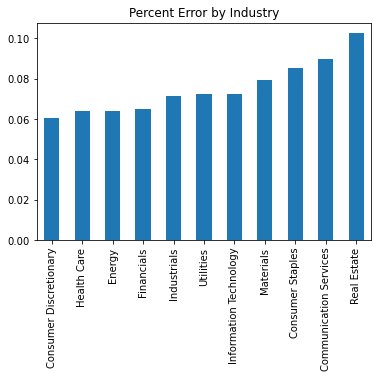

In [ ]:
wrong =y_test != y_pred
wrong = test_model.iloc[list(wrong[wrong==True].index),:]['GICS Sector'].value_counts()/test_model['GICS Sector'].value_counts()
wrong = wrong.sort_values()
wrong.plot(kind = 'bar' )
plt.xticks(rotation = 90)
plt.title('Percent Error by Industry')
print()

In [ ]:
feature_importance = dict(zip( model_columns, clf.feature_importances_))
pd.DataFrame.from_dict(feature_importance, orient = 'index').sort_values(by = 0, ascending = False).head(5)

,0
QTQ_ps,0.179599
QTQ_ptb,0.087848
QTQ_CAPEI,0.050498
dpr,0.017312
QTQ_pe_op_dil,0.016803


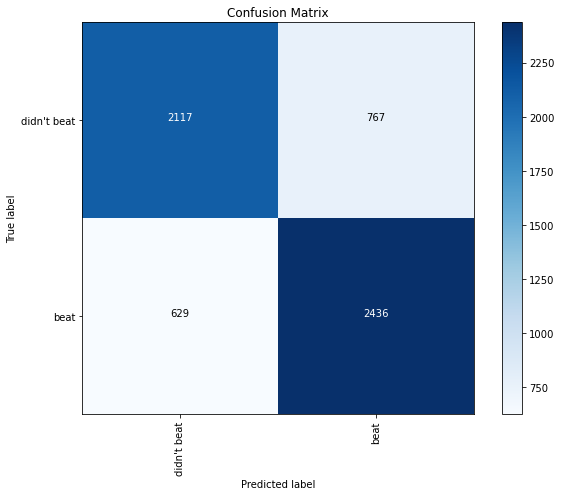

In [ ]:
from sklearn.metrics import confusion_matrix
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1])
scores_dict = {}
scores_dict['Accuracy'] = metrics.accuracy_score(y_test, y_pred)
scores_dict['Precision'] = metrics.precision_score(y_test, y_pred)
scores_dict['Recall'] = metrics.recall_score(y_test, y_pred)
scores_dict['F1-Score'] = metrics.f1_score(y_test, y_pred)
scores_dict['AUC'] = metrics.auc(fpr, tpr)
plt.figure(figsize=(9, 7))
draw_confusion_matrix(y_test, y_pred, ['didn\'t beat', 'beat'])
